In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [32]:
from tensorflow.keras.datasets import cifar10
(x_train,y_train),(x_test,y_test)=cifar10.load_data()
print("training data shape :",x_train.shape)
print("test data shape :",x_test.shape)

training data shape : (50000, 32, 32, 3)
test data shape : (10000, 32, 32, 3)


In [33]:
classes=np.unique(y_train)
nClasses=len(classes)
print("total number of output :",nClasses)
print("output classes :",classes)

total number of output : 10
output classes : [0 1 2 3 4 5 6 7 8 9]


In [34]:
label_dict={
    0:'airplane',
    1:'auto',
    2:'bird',
    3:'cat',
    4:'deer',
    5:'dog',
    6:'frog',
    7:'horse',
    8:'ship',
    9:'truck',
}

Text(0.5, 1.0, '(Label:frog)')
Text(0.5, 1.0, '(Label:cat)')


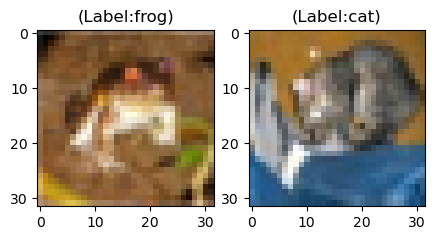

In [35]:
plt.figure(figsize=[5,5])
plt.subplot(121)
curr_img=np.reshape(x_train[0],(32,32,3))
plt.imshow(curr_img)
print(plt.title("(Label:"+str(label_dict[y_train[0][0]])+")"))

plt.subplot(122)
curr_img=np.reshape(x_test[0],(32,32,3))
plt.imshow(curr_img)
print(plt.title("(Label:"+str(label_dict[y_test[0][0]])+")"))

In [36]:
np.min(x_train),np.max(x_train)

(0, 255)

In [37]:
x_train=x_train/255.0

In [38]:
np.min(x_train),np.max(x_train)

(0.0, 1.0)

In [39]:
x_train_flat=x_train.reshape(-1,3072)
feat_cols=['pixel'+str(i) for i in range(x_train_flat.shape[1])]
df_cifar=pd.DataFrame(x_train_flat,columns=feat_cols)
df_cifar['label']=y_train
print('size of dataframe :{}'.format(df_cifar.shape))

size of dataframe :(50000, 3073)


In [40]:
df_cifar.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel3063,pixel3064,pixel3065,pixel3066,pixel3067,pixel3068,pixel3069,pixel3070,pixel3071,label
0,0.231373,0.243137,0.247059,0.168627,0.180392,0.176471,0.196078,0.188235,0.168627,0.266667,...,0.847059,0.721569,0.549020,0.592157,0.462745,0.329412,0.482353,0.360784,0.282353,6
1,0.603922,0.694118,0.733333,0.494118,0.537255,0.533333,0.411765,0.407843,0.372549,0.400000,...,0.560784,0.521569,0.545098,0.560784,0.525490,0.556863,0.560784,0.521569,0.564706,9
2,1.000000,1.000000,1.000000,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,...,0.305882,0.333333,0.325490,0.309804,0.333333,0.325490,0.313725,0.337255,0.329412,9
3,0.109804,0.098039,0.039216,0.145098,0.133333,0.074510,0.149020,0.137255,0.078431,0.164706,...,0.211765,0.184314,0.109804,0.247059,0.219608,0.145098,0.282353,0.254902,0.180392,4
4,0.666667,0.705882,0.776471,0.658824,0.698039,0.768627,0.694118,0.725490,0.796078,0.717647,...,0.294118,0.309804,0.321569,0.278431,0.294118,0.305882,0.286275,0.301961,0.313725,1


In [ ]:
from sklearn.decomposition import PCA
pca_cifar=PCA(n_components=2)
principalcomponent_cifar=pca_cifar.fit_transform(df_cifar.iloc[:,:-1])

In [ ]:
principal_cifar_Df=pd.DataFrame(data=principalcomponent_cifar,columns=['principal component 1','principal component 2'])
principal_cifar_Df['y']=y_train

In [ ]:
principal_cifar_Df.head()

In [ ]:
pca_cifar.explained_varience_ratio_

In [ ]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="principal component 1",y="principal component2",
    hue="y",
    palette=sns.color_palette("hls",10),
    legend="full",
    alpha=0.3
)